In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from keras.layers import Input, Dense
from keras.models import Model
import time
from sklearn.metrics import silhouette_samples, silhouette_score
import networkx as nx
import matplotlib.pyplot as plt
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import SpectralClustering
from matplotlib import pyplot
from sklearn import metrics
#from modularity_maximization.utils import get_modularity

In [ ]:
!git clone https://github.com/zhiyzuo/python-modularity-maximization.git

In [ ]:
cd python-modularity-maximization/

In [ ]:
!python setup.py install

In [10]:
community = np.zeros((80,80),dtype='float')
friend = np.zeros((80,80),dtype='float')

In [11]:
fichier_community = open("/content/drive/MyDrive/data/community.txt", "r")
fichier_friend = open("/content/drive/MyDrive/data/friend.txt", "r")
lines_community = fichier_community.readlines()
lines_friend = fichier_friend.readlines()
fichier_friend.close()
fichier_community.close()
for line in lines_community:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  community[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  community[(int(l[1])-1)][(int(l[0])-1)]=float(l[2]) 
for line in lines_friend:
  line=line.replace('\n', '')
  l = list(line.split(" "))
  friend[(int(l[0])-1)][(int(l[1])-1)]=float(l[2])
  friend[(int(l[1])-1)][(int(l[0])-1)]=float(l[2])  

In [ ]:
friend

In [16]:
#trouver les positions des lignes nulles
f=friend
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [17]:
print(l2)

[]


In [15]:
#suppression des lignes nulles
for i in range(len(l2)):
  friend=(np.delete(friend, (l2[i]-i), axis=0))
  friend=(np.delete(friend, (l2[i]-i), axis=1))

In [18]:
friend.shape

(59, 59)

In [19]:
#trouver les positions des lignes nulles
f=community
l2=[]
k=0
for i in range(len(f)):
  for j in range(len(f)):
    if(f[i][j]==0):
      k+=1
  if(k==len(f)):
    l2.append(i)
  k=0 

In [ ]:
print(l2)

In [20]:
#suppression des lignes nulles du community
for i in range(len(l2)):
  community=(np.delete(community, (l2[i]-i), axis=0))
  community=(np.delete(community, (l2[i]-i), axis=1))

In [21]:
#suppression des autres lignes non nuls pour arriver a une dimension 59*59
for i in range(6):
  community=(np.delete(community, (0), axis=0))
  community=(np.delete(community, (0), axis=1))

In [22]:
community.shape

(59, 59)

In [23]:
#trouver les i_leader
B_community=np.sum(community,axis=0)
l_community=B_community.tolist()
B_friend=np.sum(friend,axis=0)
l_friend=B_friend.tolist()
i_leader_community=l_community.index(max(l_community))
i_leader_friend=l_friend.index(max(l_friend))

In [ ]:
#friend modifié
l3=list(range(59))
i_leader=i_leader_friend
A=friend
o_friend=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_friend.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_friend.append(i_leader)  
print(l3)
print(len(o_friend)) 
print(o_friend) 

In [ ]:
#community modifié
l3=list(range(59))
i_leader=i_leader_community
A=community
o_community=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_community.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_community.append(i_leader)  
print(l3)
print(len(o_community)) 
print(o_community) 

In [26]:
#les matrices modifiées(dima kamel el 5edma b he4om)
C_community = np.zeros((59,59),dtype='float')
C_friend = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_community[i][j]=community[o_community[i]][o_community[j]]
    C_friend[i][j]=friend[o_friend[i]][o_friend[j]]

In [27]:
#graph friend/community
g_x_community= nx.DiGraph(C_community)
graph_community=g_x_community.to_undirected()
g_x_friend= nx.DiGraph(C_friend)
graph_friend=g_x_friend.to_undirected()

In [84]:
#model autoencoder
input_df = Input( shape = (59, ))
x = Dense(50, activation = 'relu')(input_df)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
#x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(x)
encoded = Dense(3, activation = 'relu', kernel_initializer='glorot_uniform')(x)
x = Dense(50, activation = 'relu', kernel_initializer='glorot_uniform')(encoded)
#x = Dense(2000, activation = 'relu', kernel_initializer='glorot_uniform')(x)
decoded = Dense(59, kernel_initializer='glorot_uniform')(x)
autoencoder = Model(input_df, decoded)
encoder = Model(input_df, encoded)
autoencoder.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [85]:
#training data friend
autoencoder.fit(C_friend, C_friend, batch_size= 120, epochs = 20, verbose = 1)

Epoch 1/20
1/1 [==============================] - 0s 368ms/step - loss: 0.3200
Epoch 2/20
1/1 [==============================] - 0s 12ms/step - loss: 0.3157
Epoch 3/20
1/1 [==============================] - 0s 7ms/step - loss: 0.3122
Epoch 4/20
1/1 [==============================] - 0s 6ms/step - loss: 0.3093
Epoch 5/20
1/1 [==============================] - 0s 14ms/step - loss: 0.3070
Epoch 6/20
1/1 [==============================] - 0s 7ms/step - loss: 0.3050
Epoch 7/20
1/1 [==============================] - 0s 6ms/step - loss: 0.3034
Epoch 8/20
1/1 [==============================] - 0s 7ms/step - loss: 0.3020
Epoch 9/20
1/1 [==============================] - 0s 5ms/step - loss: 0.3008
Epoch 10/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2997
Epoch 11/20
1/1 [==============================] - 0s 6ms/step - loss: 0.2986
Epoch 12/20
1/1 [==============================] - 0s 5ms/step - loss: 0.2975
Epoch 13/20
1/1 [==============================] - 0s 8ms/step - loss

In [86]:
#training data community
autoencoder.fit(C_community, C_community, batch_size= 120, epochs = 30, verbose = 1)

Epoch 1/30
1/1 [==============================] - 0s 5ms/step - loss: 0.5416
Epoch 2/30
1/1 [==============================] - 0s 10ms/step - loss: 0.5371
Epoch 3/30
1/1 [==============================] - 0s 7ms/step - loss: 0.5310
Epoch 4/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5238
Epoch 5/30
1/1 [==============================] - 0s 6ms/step - loss: 0.5156
Epoch 6/30
1/1 [==============================] - 0s 8ms/step - loss: 0.5061
Epoch 7/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4958
Epoch 8/30
1/1 [==============================] - 0s 7ms/step - loss: 0.4851
Epoch 9/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4741
Epoch 10/30
1/1 [==============================] - 0s 6ms/step - loss: 0.4625
Epoch 11/30
1/1 [==============================] - 0s 15ms/step - loss: 0.4507
Epoch 12/30
1/1 [==============================] - 0s 9ms/step - loss: 0.4387
Epoch 13/30
1/1 [==============================] - 0s 5ms/step - loss: 

In [87]:
#predect data compression
pred_friend = encoder.predict(friend)
pred_community = encoder.predict(C_community)

In [88]:

score_community = []
score_friend = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred_friend)
    score_friend.append(kmeans.inertia_)
    kmeans.fit(pred_community)
    score_community.append(kmeans.inertia_)
   

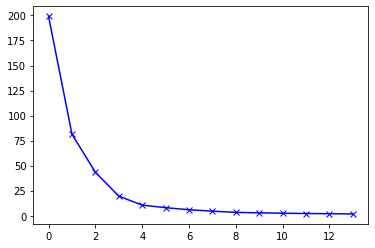

In [89]:
plt.plot(score_community, 'bx-')

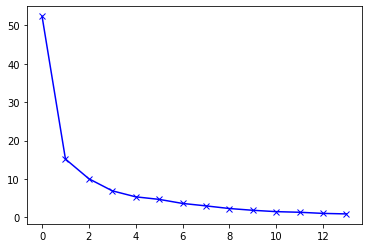

In [90]:
plt.plot(score_friend, 'bx-')

In [91]:
#kmeans community
#from jqmcvi import base
import sklearn
kmeans = KMeans(3)
kmeans.fit(pred_community)
labels_community = kmeans.labels_
silhouette_avg = silhouette_score(pred_community, labels_community)
Davies_community= sklearn.metrics.davies_bouldin_score(pred_community, labels_community)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_community, labels_community)  

print(Calinski_Harabaz)
print(Davies_community)
print(silhouette_avg)
#dict={}
#for i in range(59):
  #dict[i]=labels_community[i]
#print(dict)  
#print(get_modularity(graph_community, dict))

100.66424960406906
0.5629630222965626
0.557676


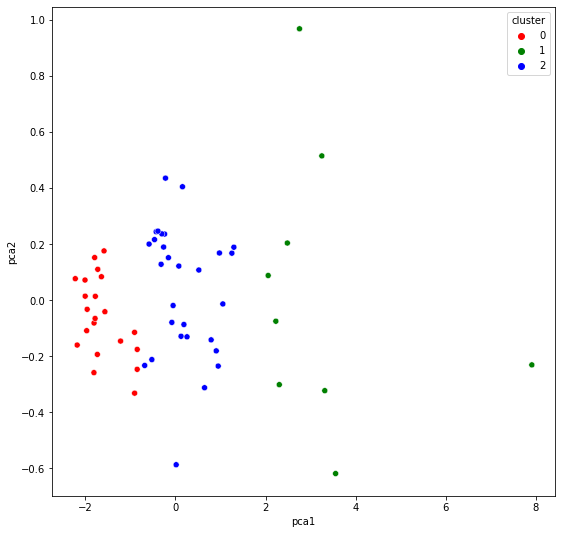

In [92]:
#community network
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred_community)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_community})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']

In [93]:
#kmeans friend
kmeans = KMeans(3)
kmeans.fit(pred_friend)
labels_friend = kmeans.labels_
silhouette_avg = silhouette_score(pred_friend, labels_friend)
Davies_friend= sklearn.metrics.davies_bouldin_score(pred_friend, labels_friend)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_friend, labels_friend)  

print(Calinski_Harabaz)
print(Davies_friend)
print(silhouette_avg)
#dict={}
#for i in range(59):
  #dict[i]=labels_friend[i]
#print(dict)  
#print(get_modularity(graph_friend, dict))

117.54230220957885
0.7221406828256072
0.46252015


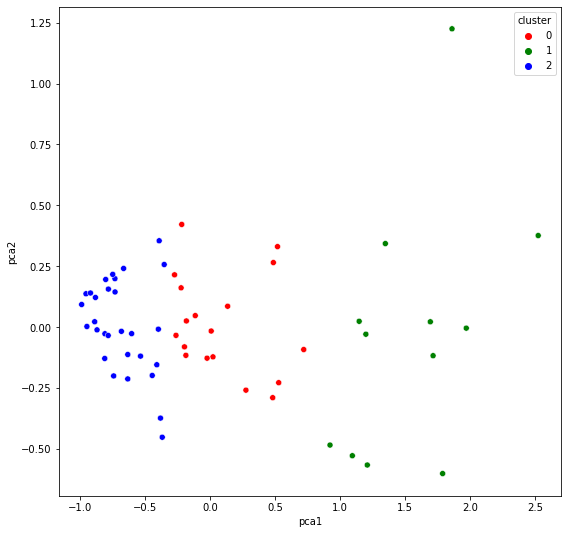

In [94]:
#friend network
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred_friend)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_friend})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']

In [95]:
M = np.zeros((59,59),dtype='float')
k=0
for i in range(58):
  for j in range(i+1,59):
    if(labels_friend[i]==labels_friend[j]):
      k+=1
    if(labels_community[i]==labels_community[j]):
      k+=1          
    M[i][j]=k
    M[j][i]=k
    k=0

In [97]:
#trouver le i_leader
B_M=np.sum(M,axis=0)
l_M=B_M.tolist()
i_leader=l_M.index(max(l_M))

In [ ]:
#M modifié
l3=list(range(59))
A=M
o_M=[]
l3.remove(i_leader)
l4=[]
l5=[]
print(i_leader)
while (len(l3)!=0):
  t2=time.time()
  for i in range(len(l3)):
    r=np.sum(np.square(A[i_leader]-A[l3[i]]))
    l4.append(r)
    l5.append(l3[i])
  o_M.append(i_leader)   
  i_leader = l5[l4.index(min(l4))]
  l3.remove(i_leader)
  l4=[]
  l5=[]
  print(time.time()-t2)
o_M.append(i_leader)  
print(l3)
print(len(o_M)) 
print(o_M)

In [99]:
C_M = np.zeros((59,59),dtype='float')
for i in range(59):
  for j in range(59):
    C_M[i][j]=M[o_M[i]][o_M[j]]

In [100]:
pred_M = encoder.predict(C_M)

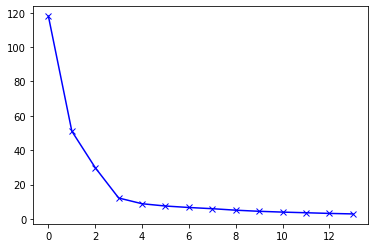

In [101]:
score_M = []
range_values = range(1, 15)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pred_M)
    score_M.append(kmeans.inertia_)
plt.plot(score_M, 'bx-')    

In [47]:
g_x_M= nx.DiGraph(C_M)
graph_M=g_x_M.to_undirected()

In [102]:
#kmeans M
kmeans = KMeans(3)
kmeans.fit(pred_M)
labels_M = kmeans.labels_
silhouette_avg = silhouette_score(pred_M, labels_M)
Davies_M= sklearn.metrics.davies_bouldin_score(pred_M, labels_M)
Calinski_Harabaz=metrics.calinski_harabasz_score(pred_M, labels_M)  

print(Calinski_Harabaz)
print(Davies_M)
print(silhouette_avg)

82.16004780440069
0.8189133515974429
0.4718418


In [103]:
fichier = open("l59relationkmeansAE.txt", "w")
st=""
for i in labels_M:
  st=str(i)
  fichier.write(st+" ")
fichier.write(st+"\n")    
fichier.close()

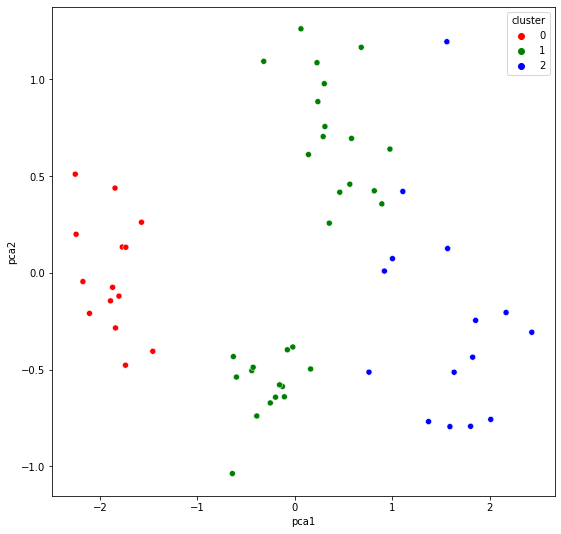

In [104]:
# network
pca = PCA(n_components = 2)
principal_comp2 = pca.fit_transform(pred_M)
pca_df2 = pd.DataFrame(data = principal_comp2, columns = ['pca1', 'pca2'])
pca_df2 = pd.concat([pca_df2, pd.DataFrame({'cluster': labels_M})], axis = 1)
plt.figure(figsize = (9,9))
ax = sns.scatterplot(x='pca1', y='pca2', hue="cluster", data = pca_df2, palette = ['red','green','blue'])
#palette = ['red','green','blue','pink','brown','yellow']